In [ ]:
import numpy as np
import pandas as pd

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology

# plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

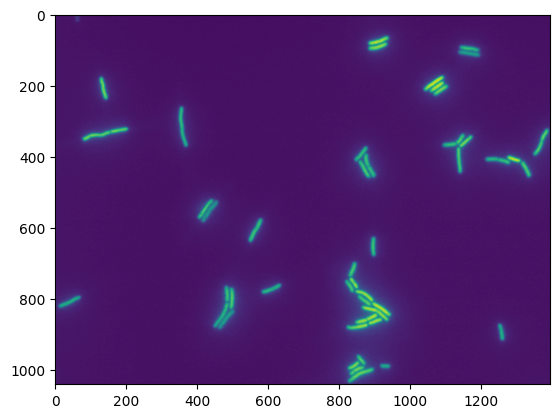

In [ ]:
#path
image_path = "/bsub_100x_cfp.tif"

#read in images from path
im_bacteria = skimage.io.imread(image_path)
ip_distance = 0.0626

# get pixels from image
height_pixels, width_pixels = im_bacteria.shape

# plot flourescence image
plt.imshow(im_bacteria)

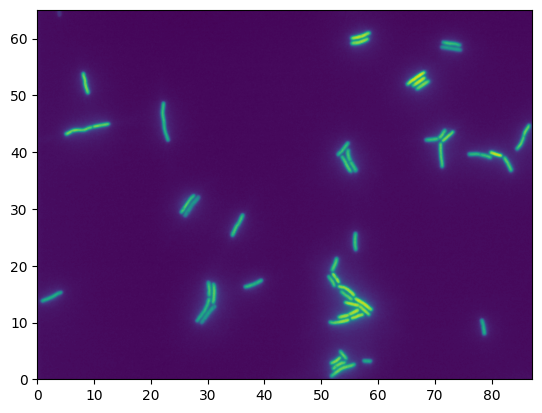

In [ ]:
#removing the noise

# Make the structuring element
selem = skimage.morphology.square(3)

# Perform the median filter
im_bacteria_filtered = skimage.filters.median(im_bacteria, selem)

# define bounds on the image and display
bounds = [0, width_pixels*ip_distance, 0 , height_pixels*ip_distance]
plt.imshow(im_bacteria_filtered, extent=bounds);

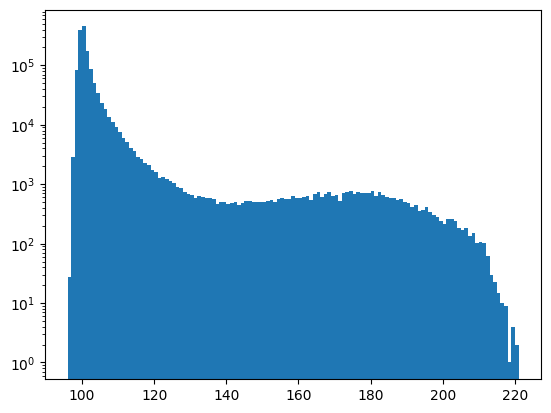

In [ ]:
# plot histogram
bins = np.arange(im_bacteria_filtered.min(), im_bacteria_filtered.max(), 1)
plt.hist(im_bacteria_filtered.flatten(), bins=bins)
plt.yscale("log");

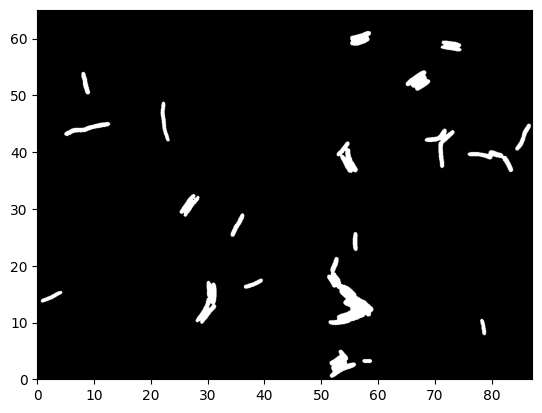

In [ ]:
#determine inflection point from the histogram by eye, this is your intensity threshold
thresh_cfp = 140

# Generate thresholded image
im_bacteria_bw = im_bacteria_filtered > thresh_cfp

# plot
plt.imshow(im_bacteria_bw, extent=bounds, cmap=plt.cm.gray);

In [ ]:
#label the BW image and print the number of clusters
labeled = skimage.measure.label(im_bacteria_bw)
num_objs = labeled.max()
num_objs

20